# Supervised Learning Chapter 2

In [18]:
import numpy as np
# ^^^ pyforest auto-imports - don't write above this line
from scipy.linalg import lstsq

### Linear Squares: Scipy

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html#scipy.linalg.lstsq


Most Common method is Least Squares where we minimize the sum of squared residuals (2-norm)







LAPACK Implementation, uses either orthogonal diagonalization or SVD

http://www.netlib.org/lapack/lug/node27.html

In [51]:
x = np.array([1, 2.5, 3.5, 4, 5, 7, 8.5])
y = np.array([0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Given our polynomial guess we compose matrix M by taking x^k where k is the respective polynomial order

In [52]:
M = x[:, np.newaxis]**[1]
M

<IPython.core.display.Javascript object>

array([[1. ],
       [2.5],
       [3.5],
       [4. ],
       [5. ],
       [7. ],
       [8.5]])

Scipy implementation returns solution, residuals, rank of matrix M, and singular values

Note singular values of a matrix result from unitary diagonalization via LAPACK ls routines, number of singular values will correspond with rank of matrix

In [53]:
p, res, rnk, s = lstsq(M, y)
print("LS Solution is", p)
print("Sum of Squared Residuals is", round(res,2))
print("Rank of LS matrix is", rnk)
print("Singular Values are", s)

LS Solution is [0.83411279]
Sum of Squared Residuals is 8.86
Rank of LS matrix is 1
Singular Values are [13.48146876]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

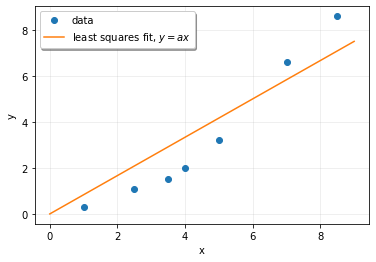

In [39]:
plt.plot(x, y, 'o', label='data')
xx = np.linspace(0, 9, 101)
yy = p[0] *xx
plt.plot(xx, yy, label='least squares fit, $y = ax$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.show()

### Higher Order Polynomial

We can still solve a least squares problem when fitting a nonlinear polynomial, this results directly from the vandermonde matrix

In [40]:
M = x[:, np.newaxis]**[0,1,2,3]
M

<IPython.core.display.Javascript object>

array([[  1.   ,   1.   ,   1.   ,   1.   ],
       [  1.   ,   2.5  ,   6.25 ,  15.625],
       [  1.   ,   3.5  ,  12.25 ,  42.875],
       [  1.   ,   4.   ,  16.   ,  64.   ],
       [  1.   ,   5.   ,  25.   , 125.   ],
       [  1.   ,   7.   ,  49.   , 343.   ],
       [  1.   ,   8.5  ,  72.25 , 614.125]])

In [41]:
p, res, rnk, s = lstsq(M, y)
print("LS Solution is", p)
print("Sum of Residuals is", round(res,2))
print("Rank of LS matrix is", rnk)
print("Singular Values are", s)

LS Solution is [ 0.82216362 -0.73286316  0.32491379 -0.0152809 ]
Sum of Residuals is 0.22
Rank of LS matrix is 4
Singular Values are [7.24690374e+02 1.74621746e+01 1.63959245e+00 3.25245346e-01]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

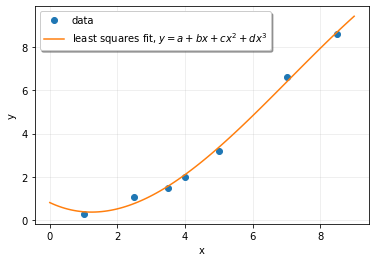

In [43]:
plt.plot(x, y, 'o', label='data')
xx = np.linspace(0, 9, 101)
yy = p[0] +p[1]*xx+p[2]*xx**2+p[3]*xx**3
plt.plot(xx, yy, label='least squares fit, $y = a+bx+cx^2+dx^3$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.show()

Questions:

    - How does this minimize the two norm?
Answer 

    - Min Norm can be solved explicitly from orthogonal diagonalization of the matrix in LAPACK
    
    
    
   

Without any penalty, Scikit learns OLS lienar model is equvalent to scipys

In [ ]:
from sklearn import linear_model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.83411279]
[13.48146876]


<IPython.core.display.Javascript object>

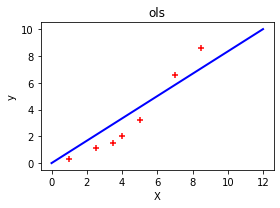

In [61]:
X_train = np.c_[1, 2.5, 3.5, 4, 5, 7, 8.5].T

y_train = [0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6]
X_test = np.c_[0,1,2,3,4,5,6,7,8,9,10,11,12].T

classifiers = dict(
    ols=linear_model.LinearRegression(fit_intercept=False)) # nonnegative 

for name, clf in classifiers.items():
    fig, ax = plt.subplots(figsize=(4, 3))


    clf.fit(X_train, y_train)
    print(clf.coef_)
    print(clf.singular_)
    ax.plot(X_test, clf.predict(X_test), linewidth=2, color="blue")
    ax.scatter(X_train, y_train, s=30, c="red", marker="+", zorder=10)

    ax.set_title(name)
    ax.set_xlabel("X")
    ax.set_ylabel("y")

    fig.tight_layout()

plt.show()

Note matching values

### Nearest Neighbors

- Applied to both supervised (notion of target variable) or unsupervised ( structure)

- This requires a definition of distance (inner product on finite vector space) however, for now assume Euclidean distance metric

- On the Neighborhood around each point some f(N(k)) needs to be applied which maps feature to our prediction , either discrete or continuous

In [1]:
from sklearn.neighbors import NearestNeighbors

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='brute').fit(X)
distances, indices = nbrs.kneighbors(X)
print(indices)
print(distances)



<IPython.core.display.Javascript object>

[[0 1]
 [1 0]
 [2 1]
 [3 4]
 [4 3]
 [5 4]]
[[0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]]


In [6]:
 nbrs.kneighbors_graph(X,mode='distance').toarray()

array([[0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 1.41421356, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.41421356,
        0.        ]])

### Different Algorithms in Solving Nearest Neighbors

- Brute Force of all N points in D dimensions
- K-Dimensional Tree
    - Use overlapping information to reduce number of computations of distance matrix across cartesian
- Ball Tree
    - Partitions data into hyperspheres , spherical coordinates
   


In [14]:
from sklearn.neighbors import KDTree

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
kdt = KDTree(X, leaf_size=30, metric='euclidean')
kdt.query(X, k=2, return_distance=False)

<IPython.core.display.Javascript object>

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]])

Question
   - How would we choose optimal k? In addition how do we specify a distance metric?
   - Should distance metric (based on vector space) match our features data??
       - Discrete input data, integer valued distance metric??